### 독버섯 분류
- 데이터셋: mushroom.csv
- 알고리즘: 지도학습 >> 분류
- 학습알고리즘:	logisticRegression, DecisionTreeClassifier, VotingClassifier

- 3개 알고리좀으로 구현 후 성능 비교

In [1]:
import pandas as pd
import numpy as np


In [2]:
DATA_PATH = r'C:\Users\KDP-43\Desktop\머신러닝_2\data\mushrooms.csv'

mushmushDF = pd.read_csv(DATA_PATH)
mushmushDF.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [3]:
mushmushDF.shape, mushmushDF.ndim

((8124, 23), 2)

In [4]:
'''
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
'''


'\n     1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s\n     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s\n     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y\n     4. bruises?:                 bruises=t,no=f\n     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s\n     6. gill-attachment:          attached=a,descending=d,free=f,notched=n\n     7. gill-spacing:             close=c,crowded=w,distant=d\n     8. gill-size:                broad=b,narrow=n\n     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y\n    10. stalk-shape:              enlarging=e,tapering=t\n    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?\n    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s\n    1

#### 결측치,중복값,이상치 확인

In [5]:
mushmushDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# 각 칼럼별 unique 값 확인
for col in mushmushDF.columns:
    	print(f'[{col}]	=> {mushmushDF[col].unique()}')
    

[class]	=> ['p' 'e']
[cap-shape]	=> ['x' 'b' 's' 'f' 'k' 'c']
[cap-surface]	=> ['s' 'y' 'f' 'g']
[cap-color]	=> ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
[bruises]	=> ['t' 'f']
[odor]	=> ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
[gill-attachment]	=> ['f' 'a']
[gill-spacing]	=> ['c' 'w']
[gill-size]	=> ['n' 'b']
[gill-color]	=> ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
[stalk-shape]	=> ['e' 't']
[stalk-root]	=> ['e' 'c' 'b' 'r' '?']
[stalk-surface-above-ring]	=> ['s' 'f' 'k' 'y']
[stalk-surface-below-ring]	=> ['s' 'f' 'y' 'k']
[stalk-color-above-ring]	=> ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
[stalk-color-below-ring]	=> ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
[veil-type]	=> ['p']
[veil-color]	=> ['w' 'n' 'o' 'y']
[ring-number]	=> ['o' 't' 'n']
[ring-type]	=> ['p' 'e' 'l' 'f' 'n']
[spore-print-color]	=> ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
[population]	=> ['s' 'n' 'a' 'v' 'y' 'c']
[habitat]	=> ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [7]:
# stalk_root '?' 개수 확인
mushmushDF['stalk-root'].value_counts()

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64

In [8]:
# stalk-root == ?인 집단 특성???
mask = (mushmushDF['stalk-root'] =='?')
# mushmushDF[mask,:].value_counts()

전체 8124개 중 2480개 => '?'	==> '?'행 삭제


In [9]:
# mask = ~(mushmushDF.str.isin({'stalk-root':['?']}))
mask = ~(mushmushDF['stalk-root'] == '?')
less_mushDF = mushmushDF.loc[mask, :].copy()

# 각 칼럼별 unique 값 확인
for col in less_mushDF.columns:
    	print(f'[{col}]	=> {less_mushDF[col].unique()}')

[class]	=> ['p' 'e']
[cap-shape]	=> ['x' 'b' 's' 'f' 'k' 'c']
[cap-surface]	=> ['s' 'y' 'f' 'g']
[cap-color]	=> ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'c']
[bruises]	=> ['t' 'f']
[odor]	=> ['p' 'a' 'l' 'n' 'f' 'c' 'm']
[gill-attachment]	=> ['f' 'a']
[gill-spacing]	=> ['c' 'w']
[gill-size]	=> ['n' 'b']
[gill-color]	=> ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'r' 'y']
[stalk-shape]	=> ['e' 't']
[stalk-root]	=> ['e' 'c' 'b' 'r']
[stalk-surface-above-ring]	=> ['s' 'f' 'k' 'y']
[stalk-surface-below-ring]	=> ['s' 'f' 'y' 'k']
[stalk-color-above-ring]	=> ['w' 'g' 'p' 'n' 'b' 'c' 'y']
[stalk-color-below-ring]	=> ['w' 'p' 'g' 'b' 'n' 'c' 'y']
[veil-type]	=> ['p']
[veil-color]	=> ['w' 'y']
[ring-number]	=> ['o' 't' 'n']
[ring-type]	=> ['p' 'e' 'l' 'n']
[spore-print-color]	=> ['k' 'n' 'u' 'h' 'r' 'w']
[population]	=> ['s' 'n' 'a' 'v' 'y' 'c']
[habitat]	=> ['u' 'g' 'm' 'd' 'p' 'l']


In [10]:
less_mushDF.shape, less_mushDF.ndim

((5644, 23), 2)

In [11]:
from sklearn.preprocessing import OneHotEncoder

#### 피쳐/타겟

In [12]:
featureDF = less_mushDF[less_mushDF.columns[1:]]
targetSR = less_mushDF['class']

print(f'featureDF:	=> {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR:	=> {targetSR.shape}, {targetSR.ndim}D')

featureDF:	=> (5644, 22), 2D
targetSR:	=> (5644,), 1D


#### 인코딩
- LabelEncoder()
- pd.get_dummies()

In [13]:
from sklearn.preprocessing import LabelEncoder

Label_encoder = LabelEncoder()

feature_dum_DF = pd.get_dummies(featureDF).copy()

#### 훈련/테스트 DS 분리

In [14]:
# one_hot_encoding Ver
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_dum_DF, targetSR,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=targetSR)

In [15]:
# # Raw Ver
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
#                                                     test_size=0.2,
#                                                     random_state=0,
#                                                     stratify=targetSR)

#### DT model 

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=10)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [17]:
# 모델 파라미터: 학습 fit()후 train DS 기반 설정된 값
print(f'[dt_model.classes_]		=>	{dt_model.classes_}')
print(f'[dt_model.n_classes_]		=>	{dt_model.n_classes_}')
print(f'[dt_model.max_features_]		=>	{dt_model.max_features_}개')
# print(f'[dt_model.feature_importances_]		=>	{dt_model.feature_importances_}')
# print(f'[dt_model.feature_names_in_]		=>	{dt_model.feature_names_in_}')

[dt_model.classes_]		=>	['e' 'p']
[dt_model.n_classes_]		=>	2
[dt_model.max_features_]		=>	98개


In [18]:
# 학습용 데이터셋에 대한 성능
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)

print(f'train_score	=> {train_score}')
print(f'test_score	=> {test_score}')

train_score	=> 1.0
test_score	=> 1.0


#### 교차검증

In [19]:
from sklearn.model_selection import cross_validate

dt_model_cross = DecisionTreeClassifier(random_state=10)

result = cross_validate(dt_model_cross, X_train, y_train,
                        return_train_score=True,
                        return_estimator=True)

resultDF = pd.DataFrame(result)
resultDF.head(3)

,fit_time,score_time,estimator,test_score,train_score
0,0.010023,0.003697,DecisionTreeClassifier(random_state=10),1.0,1.0
1,0.008999,0.003087,DecisionTreeClassifier(random_state=10),1.0,1.0
2,0.008543,0.003030,DecisionTreeClassifier(random_state=10),1.0,1.0


#### 하이퍼-파라미터 튜닝

In [20]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[10,11,8,7,6,5],
          'min_samples_leaf':[10,30,50,100]}			# min_leaf 기준 max_depth 결정?!?!

grid_CV = GridSearchCV( dt_model_cross, param_grid=params,
                       return_train_score = True)

grid_CV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [10, 11, 8, 7, 6, 5],
                         'min_samples_leaf': [10, 30, 50, 100]},
             return_train_score=True)

In [21]:
# 모델 파라미터
print(f'[grid_CV.grid_CV.best_params_]		{grid_CV.best_params_}')
print(f'[grid_CV.grid_CV.best_score_]		{grid_CV.best_score_}')
print(f'[grid_CV.grid_CV.best_estimator_]		{grid_CV.best_estimator_}')
# print(f'[grid_CV.grid_CV.cv_results_]\n		{grid_CV.cv_results_}')

[grid_CV.grid_CV.best_params_]		{'max_depth': 10, 'min_samples_leaf': 10}
[grid_CV.grid_CV.best_score_]		0.9977851605758582
[grid_CV.grid_CV.best_estimator_]		DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=10)


#### 주요 피쳐 시각화|

In [22]:
best_model = grid_CV.best_estimator_
print(f'[best_model.max_depth] {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] {best_model.min_samples_leaf}')

[best_model.max_depth] 10
[best_model.min_samples_leaf] 10


In [23]:
# 피쳐 중요도 및 개수
best_model.feature_importances_, best_model.n_features_in_

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00177241,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04847172, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.17632729, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05719225, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [44]:
aaa = best_model.feature_importances_.tolist()
print(aaa)
bbb=sorted(aaa,reverse=True)[:6]
print(bbb)
# print(type(aaa))


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0017724144748857687, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04847171556005662, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1763272865669497, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05719224797067526, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05881593571420873, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6269148074348312, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010965952372574549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019539639905818258, 0.0]
[0.6269148074348312, 0.1763272865669497, 0.05881593571420873, 0.05719224797067526, 0.04847171556005662, 0.019539639905818258]


In [47]:
print(-np.sort(-best_model.feature_importances_)[:6])
print(np.argsort(-best_model.feature_importances_)[:6])

bbb = -np.sort(-best_model.feature_importances_)[:6]
bbb_idx = np.argsort(-best_model.feature_importances_)[:6]

[0.62691481 0.17632729 0.05881594 0.05719225 0.04847172 0.01953964]
[80 32 74 42 25 96]


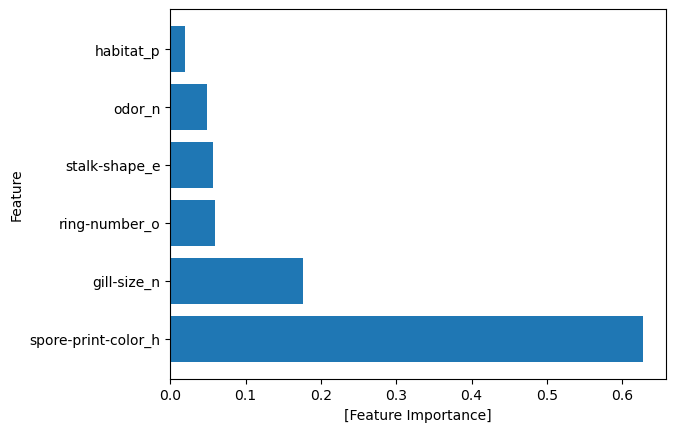

In [49]:
import matplotlib.pyplot as plt

plt.barh(range(len(bbb)), bbb, align='center')
plt.yticks(np.arange(len(bbb)), best_model.feature_names_in_[bbb_idx])
plt.xlabel("[Feature Importance]")
plt.ylabel("Feature")
plt.show()

#### DT 그래프 시각화 w/ Graphviz

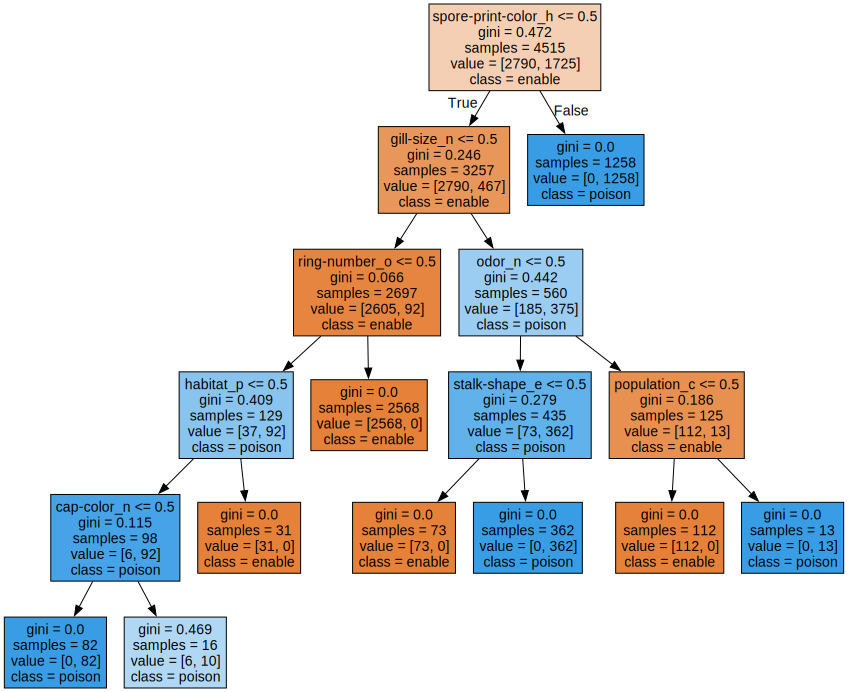

In [26]:
from sklearn.tree import export_graphviz

# DT 모델 결과를 .dot 파일로 저장 => export_graphviz
export_graphviz(best_model, out_file='mush_mush.dot', class_names=['enable','poison'],
                feature_names=best_model.feature_names_in_,
                impurity=True,
                filled=True
                # rotate=True						# 가로방향으로 회전
                )

import graphviz

with open('mush_mush.dot') as f:
    
	# 파일 내용 읽기
    dot_data = f.read()
    
graphviz.Source(dot_data)

In [27]:
# new_data = featureDF.iloc[[0]] + 0.21				# 1D => 2D

print('predict	=>', best_model.predict(X_test) )
y_predict = best_model.predict(X_test)
print(type(y_predict))
print((y_predict == y_test).sum())
print(y_test.shape)

predict	=> ['e' 'p' 'p' ... 'p' 'e' 'e']
<class 'numpy.ndarray'>
1127
(1129,)


In [28]:
print("train_score",best_model.score(X_train,y_train))
print("test_score",best_model.score(X_test,y_test))

train_score 0.998671096345515
test_score 0.9982285208148804


#### Logistic 회귀

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [36]:
## 모델 파라미터
print(f'classes_ : {lr.classes_}  {len(lr.classes_)}개')
print(f'n_features_in_ : {lr.n_features_in_}')
print(f'n_iter_ : {lr.n_iter_}')
print()
print(f'coef_ : {lr.coef_}')						# => f1, f2, f3, f4, f5
print(f'intercept_ : {lr.intercept_}')

classes_ : ['e' 'p']  2개
n_features_in_ : 98
n_iter_ : [60]

coef_ : [[ 8.64529609e-02  3.58722401e-01  8.37120075e-02  1.25953408e-02
  -5.43312072e-01  2.21658057e-03 -9.52438269e-01  3.98127157e-01
   3.96737589e-01  1.57960742e-01  9.26095432e-01 -6.37358891e-01
  -2.43190523e-01 -4.35596476e-02 -6.23275353e-01  7.42446003e-01
   3.73189207e-01 -4.93959008e-01 -8.22868915e-02  8.26741100e-02
  -2.50388737e+00  2.28419060e+00  2.37382232e+00 -2.48524659e+00
   4.15132343e-01 -2.84943504e+00  2.76581096e+00  1.85039944e-01
  -1.84652726e-01  3.62023096e-01 -3.61635877e-01 -1.37747155e+00
   1.37785877e+00  4.11456476e-03  4.03607402e-01 -3.90734956e-01
  -3.99655768e-01 -8.96441976e-02  4.48861985e-01  1.13676884e-01
  -3.91966089e-01  3.02127393e-01  1.42654843e+00 -1.42616121e+00
   1.84099069e+00 -1.35853356e+00  2.67546851e-01 -7.49616758e-01
  -3.51865112e-01  1.04940281e+00 -9.90513852e-01  2.93363375e-01
  -1.26476089e-01  6.34270464e-01 -4.66286117e-01 -4.11210399e-02
   1.72

In [38]:
# 모델 성능 평가
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(f'train score => {train_score}')
print(f'test score => {test_score}')

train score => 1.0
test score => 1.0


#### 학습 진행 w/ 앙상블 Voting
-질문)
	- 위에서 추출한 각 모델에 대한 최적 하이퍼-파라미터 값을 앙상블에 어떻게 반영??!?!

In [29]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier

dt_model = DecisionTreeClassifier(random_state=10)
lr_model = LogisticRegression(solver='liblinear')

# Hard Ver
hard_vmodel = VotingClassifier(estimators=[('dt_modle',dt_model),
                                           ('lr_model',lr_model)],
                                           voting = 'hard')


# Hard Ver
soft_vmodel = VotingClassifier(estimators=[('dt_modle',dt_model),
                                           ('lr_model',lr_model)],
                                           voting = 'soft')
hard_vmodel.fit(X_train, y_train)
soft_vmodel.fit(X_train, y_train)

VotingClassifier(estimators=[('dt_modle',
                              DecisionTreeClassifier(random_state=10)),
                             ('lr_model',
                              LogisticRegression(solver='liblinear'))],
                 voting='soft')

In [30]:
# VotingClassifier 모델 파라미터

print(f'[hard_vmodel.classes_] {hard_vmodel.classes_}')
print(f'[hard_vmodel.estimators_] {hard_vmodel.estimators_}]')
print(f'[hard_vmodel.named_estimators_] {hard_vmodel.named_estimators_}')
print()
print(f'[hard_vmodel.n_features_in_] {hard_vmodel.n_features_in_}개')

[hard_vmodel.classes_] ['e' 'p']
[hard_vmodel.estimators_] [DecisionTreeClassifier(random_state=10), LogisticRegression(solver='liblinear')]]
[hard_vmodel.named_estimators_] {'dt_modle': DecisionTreeClassifier(random_state=10), 'lr_model': LogisticRegression(solver='liblinear')}

[hard_vmodel.n_features_in_] 98개


In [31]:
# VotingClassifier 모델 파라미터

print(f'[soft_vmodel.classes_] {soft_vmodel.classes_}')
print(f'[soft_vmodel.estimators_] {soft_vmodel.estimators_}]')
print(f'[soft_vmodel.named_estimators_] {soft_vmodel.named_estimators_}')
print()
print(f'[soft_vmodel.n_features_in_] {soft_vmodel.n_features_in_}개')

[soft_vmodel.classes_] ['e' 'p']
[soft_vmodel.estimators_] [DecisionTreeClassifier(random_state=10), LogisticRegression(solver='liblinear')]]
[soft_vmodel.named_estimators_] {'dt_modle': DecisionTreeClassifier(random_state=10), 'lr_model': LogisticRegression(solver='liblinear')}

[soft_vmodel.n_features_in_] 98개


In [32]:
# votingclassifier score => mean accuracy!!!

train_score = hard_vmodel.score(X_train, y_train)			# KNN DF issue로 ndarray로 값만 입력
test_score = hard_vmodel.score(X_test, y_test)
print(f'[Hard Voting]	train_score: {train_score}, test_score {test_score}')

soft_train_score = soft_vmodel.score(X_train, y_train)			
soft_test_score = soft_vmodel.score(X_test, y_test)
print(f'[Soft Voting]	train_score: {soft_train_score}, test_score {soft_test_score}')

[Hard Voting]	train_score: 1.0, test_score 1.0
[Soft Voting]	train_score: 1.0, test_score 1.0


In [33]:
hard_vmodel.get_params

<bound method _BaseHeterogeneousEnsemble.get_params of VotingClassifier(estimators=[('dt_modle',
                              DecisionTreeClassifier(random_state=10)),
                             ('lr_model',
                              LogisticRegression(solver='liblinear'))])>

In [34]:
hard_vmodel.set_params

<bound method _BaseHeterogeneousEnsemble.set_params of VotingClassifier(estimators=[('dt_modle',
                              DecisionTreeClassifier(random_state=10)),
                             ('lr_model',
                              LogisticRegression(solver='liblinear'))])>